<img src="light-bulb.png" alt="Flowers in Chania" style="float:left;width:100px;height:100px;">
<center><h1 style="color:#B40404;">Electric Power Generation prediction in Canada</h1></center>

<h5 style="color:#585858;">Author: Vannia Hnatiuk</h5>
<h5 style="color:#585858;">Date: April 4<sup>th</sup>, 2022</h5>

[1. Background](#one)<br>
    [1.1 About the data](#one-one)<br>
    [1.2 Canada](#one-two)<br>
[2. Exploratory Data Analysis](#two) <br>
    [2.1 Descriptive Statistics](#two-one)<br>
    [2.2 System Representation](#two-two)<br>
    [2.3 Cleaning](#two-three)<br>
    [2.4 Trend Decomposition](#two-four)<br>
        [2.4.1 Addiitive Decomposition](#two-four-one)<br>
        [2.4.2 Multiplicative Decomposition](#two-four-two)<br>
    [2.5 Stationarity](#two-five)<br>
        [2.5.1 Augmented Dickey Fuller Test](#two-five-one)<br>
        [2.5.2 Kwiatkowski-Phillips-Schmidt-Shin test](#two-five-two)<br>
    [2.6 Stationarity Preprocessing](#two-six)<br>
[4. Conclusions](#four) <br>
[5. References](#five)    

<center ><h2><a style="color:#943126;" id='one'> Background</a></h2></center>

<p style="text-align:justified;">Energy is one of the basic human needs. A country needs electricity for manufacturing, economy and information technology. For this reason, it will be essential to unveil how much electricity Canada produce and sell to other countries. Currently, fossil fuels generate most of the power supply in the country.
Business Case: How much expensive will be to consume/produce electricity? How much will cost to produce electricity? Industry and Businesses must know how much capital to allocate for energy consumption for their production. Equally important, they can determine the cost of their products or services.</p>


Importing the necessary library to perform the analysis

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#new pandas index
from pandas import Int64Index as NumericIndex

/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/var/folders/rf/tbzlwmhn4t3_np15yjldzz200000gn/T/ipykernel_35782/3303274853.py:20: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<h3> <a style="color:#943126;" id='one-one'>About the data</a></h3>

<p style="text-align:justified;"> This <span style="color:#943126;">.csv</span> file were obtained from the government's of Canada Open Data Portal. This table contains 347 series, with data for years 1950 - 2007 (not all combinations necessarily have data for all years), and is no longer being released. This table contains data described by the following dimensions (Not all combinations are available): Geography (15 items: Canada;Newfoundland and Labrador;Prince Edward Island;Nova Scotia; ...); Electric power, components (33 items: Overall total generation;Total utility generation;Total industrial generation;Total hydro generation; ...). </p><br>

<p>Importing the <span style="color:#943126">.csv</span> file and directly formatting the <span style="color:#943126;">'REF_DATE'</span> column due to this analysis is going to be through a <b>Time Series</b> modeling.

In [2]:
electric_power_stats=pd.read_csv('data/electric_power_stats.csv', parse_dates=['REF_DATE'])
electric_power_stats.head()

/var/folders/rf/tbzlwmhn4t3_np15yjldzz200000gn/T/ipykernel_35782/1582805510.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  electric_power_stats=pd.read_csv('data/electric_power_stats.csv', parse_dates=['REF_DATE'])


,REF_DATE,GEO,DGUID,"Electric power, components",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1950-01-01,Canada,NaN,Overall total generation,Megawatt hours,210,units,0,v222432,1.117,4081000.0,NaN,NaN,NaN,0
1,1950-01-01,Canada,NaN,Total utility generation,Megawatt hours,210,units,0,v222421,1.106,3887000.0,NaN,NaN,NaN,0
2,1950-01-01,Canada,NaN,Total hydro generation,Megawatt hours,210,units,0,v222427,1.112,3911000.0,NaN,NaN,NaN,0
3,1950-01-01,Canada,NaN,Total available,Megawatt hours,210,units,0,v222441,1.130,3953000.0,NaN,NaN,NaN,0
4,1950-02-01,Canada,NaN,Overall total generation,Megawatt hours,210,units,0,v222432,1.117,3780000.0,NaN,NaN,NaN,0


Inspecting the structure of this dataset:
<ul>
<li>This dataset has 120,927 observations</li>
<li>15 features</li>
<li>Null values in 'VALUE', 'DGUID','STATUS' and 'SYMBOL' columns</li>
<li>There is a mix of datatypes: datetime, object, int64 and float64 datatypes</li>
</li>

In [3]:
electric_power_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120927 entries, 0 to 120926
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   REF_DATE                    120927 non-null  datetime64[ns]
 1   GEO                         120927 non-null  object        
 2   DGUID                       0 non-null       float64       
 3   Electric power, components  120927 non-null  object        
 4   UOM                         120927 non-null  object        
 5   UOM_ID                      120927 non-null  int64         
 6   SCALAR_FACTOR               120927 non-null  object        
 7   SCALAR_ID                   120927 non-null  int64         
 8   VECTOR                      120927 non-null  object        
 9   COORDINATE                  120927 non-null  float64       
 10  VALUE                       119749 non-null  float64       
 11  STATUS                      1178 non-nu

<p>A fundamental step for a Time Series Analysis is to assign the 'date' column as an index of the dataframe</p>

In [4]:
electric_power_stats = electric_power_stats.set_index('REF_DATE')
electric_power_stats.head()

,GEO,DGUID,"Electric power, components",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,
1950-01-01,Canada,NaN,Overall total generation,Megawatt hours,210,units,0,v222432,1.117,4081000.0,NaN,NaN,NaN,0
1950-01-01,Canada,NaN,Total utility generation,Megawatt hours,210,units,0,v222421,1.106,3887000.0,NaN,NaN,NaN,0
1950-01-01,Canada,NaN,Total hydro generation,Megawatt hours,210,units,0,v222427,1.112,3911000.0,NaN,NaN,NaN,0
1950-01-01,Canada,NaN,Total available,Megawatt hours,210,units,0,v222441,1.130,3953000.0,NaN,NaN,NaN,0
1950-02-01,Canada,NaN,Overall total generation,Megawatt hours,210,units,0,v222432,1.117,3780000.0,NaN,NaN,NaN,0


<p>Let's proceed to do an initial elimation of non relevant features for the analysis</p>

In [5]:
non_relevant_columns=['DGUID','UOM_ID','SCALAR_FACTOR',
                        'SCALAR_ID','VECTOR','COORDINATE',
                        'STATUS','SYMBOL','TERMINATED','DECIMALS']

In [6]:
electric_power_stats.drop(non_relevant_columns,axis=1,inplace=True)

First Dataframe version

In [7]:
electric_power_stats.head()

,GEO,"Electric power, components",UOM,VALUE
REF_DATE,,,,
1950-01-01,Canada,Overall total generation,Megawatt hours,4081000.0
1950-01-01,Canada,Total utility generation,Megawatt hours,3887000.0
1950-01-01,Canada,Total hydro generation,Megawatt hours,3911000.0
1950-01-01,Canada,Total available,Megawatt hours,3953000.0
1950-02-01,Canada,Overall total generation,Megawatt hours,3780000.0


Reordening columns according to relevance

In [8]:
electric_power_stats=electric_power_stats[['VALUE','UOM','Electric power, components','GEO']]
electric_power_stats

,VALUE,UOM,"Electric power, components",GEO
REF_DATE,,,,
1950-01-01,4081000.0,Megawatt hours,Overall total generation,Canada
1950-01-01,3887000.0,Megawatt hours,Total utility generation,Canada
1950-01-01,3911000.0,Megawatt hours,Total hydro generation,Canada
1950-01-01,3953000.0,Megawatt hours,Total available,Canada
1950-02-01,3780000.0,Megawatt hours,Overall total generation,Canada
...,...,...,...,...
2007-12-01,0.0,Megawatt hours,Industrial internal combustion generation,Nunavut
2007-12-01,0.0,Megawatt hours,Total combustion turbine generation,Nunavut
2007-12-01,0.0,Megawatt hours,Utility combustion turbine generation,Nunavut


<h2><a style="color:#B40404;" id='one-two'>Canada</a> </h2>

<p>This analysis will be performed on a National basis. Hence, this dataframe will be fragmented with the selection of <span style="color:#B40404;">'GEO' </span> with 'Canada' instead of the provinces.

In [9]:
canada=electric_power_stats[electric_power_stats['GEO'] == 'Canada']
canada

,VALUE,UOM,"Electric power, components",GEO
REF_DATE,,,,
1950-01-01,4081000.0,Megawatt hours,Overall total generation,Canada
1950-01-01,3887000.0,Megawatt hours,Total utility generation,Canada
1950-01-01,3911000.0,Megawatt hours,Total hydro generation,Canada
1950-01-01,3953000.0,Megawatt hours,Total available,Canada
1950-02-01,3780000.0,Megawatt hours,Overall total generation,Canada
...,...,...,...,...
2007-12-01,2621615.0,Megawatt hours,Total non-firm deliveries,Canada
2007-12-01,2621615.0,Megawatt hours,Non-firm deliveries to the United States,Canada
2007-12-01,-497033.0,Megawatt hours,Total other deliveries,Canada


Currently, the analysis will be executed on the total of electricity generated from all sources. 

In [10]:
canada=canada[canada['Electric power, components'] == 'Overall total generation']
canada

,VALUE,UOM,"Electric power, components",GEO
REF_DATE,,,,
1950-01-01,4081000.0,Megawatt hours,Overall total generation,Canada
1950-02-01,3780000.0,Megawatt hours,Overall total generation,Canada
1950-03-01,4186000.0,Megawatt hours,Overall total generation,Canada
1950-04-01,4070000.0,Megawatt hours,Overall total generation,Canada
1950-05-01,4425000.0,Megawatt hours,Overall total generation,Canada
...,...,...,...,...
2007-08-01,48161855.0,Megawatt hours,Overall total generation,Canada
2007-09-01,42731316.0,Megawatt hours,Overall total generation,Canada
2007-10-01,46575984.0,Megawatt hours,Overall total generation,Canada


Structure of the dataframe that will be analysed 

In [11]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 1950-01-01 to 2007-12-01
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VALUE                       696 non-null    float64
 1   UOM                         696 non-null    object 
 2   Electric power, components  696 non-null    object 
 3   GEO                         696 non-null    object 
dtypes: float64(1), object(3)
memory usage: 27.2+ KB


<center><h2><a style="color:#943126;" id='two'>Exploratory Data Analysis</a></h2></center>

The target observation will be 'VALUE'. This feature is the Power Electricity scaled in Mega Watt-Hour. Electric Power is the rate at which electrical energy is produced. It is calculated using the following equation:<br>
$$P = IV $$
Where:<br>
P=Power in Watts <br>
I=current in Ampers <br>
V=Voltage in Volts <br>

<q>A megawatt is a unit for measuring power that is equivalent to one million watts.  One megawatt is equivalent to the energy produced by 10 automobile engines.
A megawatt hour (Mwh) is equal to 1,000 Kilowatt hours (Kwh).  It is equal to 1,000 kilowatts of electricity used continuously for one hour.  It is about equivalent to the amount of electricity used by about 330 homes during one hour.</q>
<a href='https://www.cleanenergyauthority.com/solar-energy-resources/what-is-a-megawatt-and-a-megawatt-hour'> Reference</a><br>

<h3><a style="color:#943126;" id='two-one'><u>Descriptive Statistics</u></a></h3>

Before to start with the analysis, a brief exploration of the distribution of the generated over the decades will be explored: 

In [12]:
df=canada[['VALUE']].copy()
df.head()

,VALUE
REF_DATE,
1950-01-01,4081000.0
1950-02-01,3780000.0
1950-03-01,4186000.0
1950-04-01,4070000.0
1950-05-01,4425000.0


For a clear comprehension of this analysis, the target feature will be renamed from 'VALUE' to 'POWER'.

In [13]:
df.rename(columns = {'VALUE':'POWER'}, inplace = True)

Verifying that the change was performed:

In [14]:
df.head()

,POWER
REF_DATE,
1950-01-01,4081000.0
1950-02-01,3780000.0
1950-03-01,4186000.0
1950-04-01,4070000.0
1950-05-01,4425000.0


In [15]:
fig = px.scatter(df, x=df.index , y=df['POWER'],
                title='Distribution of Electricity Generation from 1950-2007',
                labels={
                        "REF_DATE":'Decade',
                        "VALUE":'Megawatt-Hour'
                        },
                template='ggplot2'                
                )
fig.show()

<p style="text-align:justified;">Since 1950 the power generation increased in a double rate for two decades. However, this rate slowed down to 1.3x from 1970 to 2000, certainly for the amount scalation of electricity production. The most noticeable plateau ocurred from the 1990 to 2000 decade, where the electricity increased from 46 millions of mwh to 57.27 millions of mwh at a 1.10 rate. Moreover, the last observed trend is from 2000 with 48.43 millions mwh to 57.33 mwh in 2007 at 1.18 rate.
The first record in 1950 showed a generation of 4.081 of millions of Meggawatt-hour, later in 1960 increased to 9.44 millions of Megawatts. </p>

<h4 style="color:#943126;" id='two-two'>System Representation</h4>

In [16]:
# add lines for each column
fig = px.line(df, x=df.index, y=df['POWER'], template='ggplot2')

# axis labels and title
fig.update_layout(
    yaxis_title="Megawatt-hour", 
    xaxis_title="Decades",
    legend_title="Power", 
    title="Power Generation over time",
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(plot_bgcolor='#F0ECEC')
fig.show()

<p style="text-align:justified;">The Electricity generation is defined by an Upstream Trend, when year by year: more electricity is being generated according to the population growth. The seasonality exhibits peaks in winter months (from November to January). This is because in winther months: days are shorter and cooler. For this reason the production tries to fulfill this demand for ilumination, heating and heat pumps. 
Next, the generation slows down and becomes steady towards March. After, it declines into warmer months when ilumination and heating is less required. On the other hand, a slight peak happens in July and August when temperature rises and more electricity is required for air conditioning. As a result, cooling appliances consume immense loads of power. 
Additionally,the distance between peaks and valleys fluctuates year by year showing an increasing variance.</p>

To know the time span its used the <span style="color:#943126;">.min()</span> and <span style="color:#943126;">.max()</span>

In [17]:
first_year = df.index.min()
last_year = df.index.max()

# pandas `Timestamp` objects
first_year, last_year

(Timestamp('1950-01-01 00:00:00'), Timestamp('2007-12-01 00:00:00'))

<h4 style="color:#515A5A;font-weight;bold"><i>Observing Monthly seasonality</i></h4>

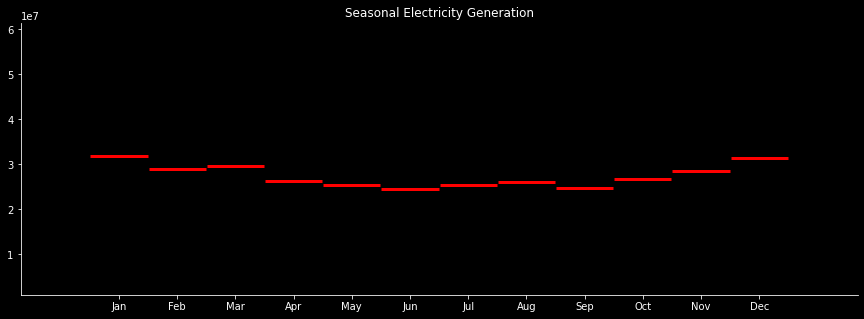

In [18]:
plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(df["POWER"], ax=plt.gca())

plt.title("Seasonal Electricity Generation")
sns.despine()
plt.show()

This graph is a magnified perspective of the seasonality in the previous wave. The peak of months with highest electricity production occurs in winter months (December-March) when days are shorter and cooler. For this reason, the electricity generation tries to fulfill the demand for heating and illumination. As temperatures rises, the generation descreases with little spikes in July and August.

<h3><a style="color:#943126;" id='two-three'><u>Data Cleaning</a></u></h3>

<h4 style="color:#515A5A;font-weight;bold"><i>Looking for null values</i></h3>

In [19]:
full_range = pd.date_range(start=first_year, end=last_year, freq="AS")

full_range.difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

There were not found null values in this time span. <br>

<h4 style="color:#515A5A;font-weight;bold"><i>Looking Duplicated values</i></h3>

In [20]:
canada.T.duplicated().any()

False

Although, there are 2 columns in this dataframe, this search for duplicated values was done for protocol. 

<h3><a style="color:#943126" id='two-four'><u>Trend Decomposition</a></u></h3>

There are two types of relation on how the components of the time series combine:

- Additive 

$$y_t = T_t + S_t + R_t$$

- Multiplicative

$$y_t = T_t * S_t * R_t$$

In order to obtain a stationary curve, it is necessary to perform a trend-seasonal decomposition where we can obtain:

- a trend component $T_t$ calculated using a moving average,
- a seasonal component $S_t$ which is the monthly/daily average of the de-trended series, and
- the residual $R_t$ that remains after subtracting the trend and seasonal component from the original series.

Adding up these three components will give back the original series. Equally important, a multiplicative decomposition it is going to be analyse

This can be performed through the function <span style="color:#943126" > seasonal_decompose</span> from <span style="color:#943126"> stats_model</span>.

<h4 id='two-four-one'>Additive </h4>

In [21]:
df_add=df.copy()

In [22]:
df_add.head()

,POWER
REF_DATE,
1950-01-01,4081000.0
1950-02-01,3780000.0
1950-03-01,4186000.0
1950-04-01,4070000.0
1950-05-01,4425000.0


In [23]:
decomposition = tsa.seasonal_decompose(df_add, model='additive')

In [24]:
df_add["Trend"] = decomposition.trend
df_add["Seasonal"] = decomposition.seasonal
df_add["Residual"] = decomposition.resid

df_add.sample(10)

,POWER,Trend,Seasonal,Residual
REF_DATE,,,,
1975-09-01,20400000.0,2.298121e+07,-2.944090e+06,3.628815e+05
1957-01-01,8071000.0,7.306833e+06,4.884914e+06,-4.120747e+06
1995-01-01,51761022.0,4.429403e+07,4.884914e+06,2.582081e+06
2002-03-01,52417786.0,4.767742e+07,2.411920e+06,2.328448e+06
1976-10-01,24616000.0,2.497162e+07,-8.701721e+05,5.145554e+05
2007-08-01,48161855.0,NaN,-1.568316e+06,NaN
1952-10-01,5419000.0,5.281417e+06,-8.701721e+05,1.007755e+06
1962-08-01,9260000.0,9.758708e+06,-1.568316e+06,1.069608e+06
1988-02-01,45936998.0,4.067806e+07,1.706670e+06,3.552272e+06


In [25]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=df_add.index, y=df_add[col],line_color='#1FA1A7'),
        row=i+1,
        col=1,
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.update_layout(plot_bgcolor='#F0ECEC')
fig.show()

Interpretation of the graph:
<ul>
<li>The trend shows an increase of power generation with some dips in the year 75', 82', 90', 98', 99', 2001, 2004 and 2006. </li>
<li>The seasonal plot shows strong seasonality scaled in Millions and repeated pattern.</li>
<li>Maximum residuals reaches 6 Millions and their mean are centered at 0 in y axis.</li>
<li>The residuals display repeated seasonality in 1950-1975. </li>
<li>Additionally, the residuals shows a fluctuating variance which it shows <span style="color:#943126">"heteroscedascity"</span></li>
</ul>

<h4 id='two-four-two'>Multiplicative</h4>

In [26]:
decomposition = tsa.seasonal_decompose(df, model='multiplicative')

Dataframe with the components of the system

In [27]:
df["Trend"] = decomposition.trend
df["Seasonal"] = decomposition.seasonal
df["Residual"] = decomposition.resid

df.sample(10)

,POWER,Trend,Seasonal,Residual
REF_DATE,,,,
1951-02-01,4378000.0,4.624167e+06,1.040517,0.909899
1959-10-01,9033000.0,8.997500e+06,0.983461,1.020829
1951-12-01,5113000.0,4.939542e+06,1.112014,0.930849
1965-05-01,11365000.0,1.178925e+07,0.956170,1.008204
1978-06-01,24142298.0,2.790484e+07,0.909138,0.951633
1984-03-01,38534282.0,3.498596e+07,1.079401,1.020401
1974-10-01,23628000.0,2.324162e+07,0.983461,1.033721
1958-01-01,8564000.0,7.820292e+06,1.150086,0.952189
1987-03-01,44126419.0,3.983210e+07,1.079401,1.026320


In [28]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=df.index, y=df[col],line_color='#F8766D'),
        row=i+1,
        col=1,
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.update_layout(plot_bgcolor='#F0ECEC')
fig.show()

This decomposition looks very similar in shape but at a different scale:
<ul>
<li>This trend also shows an increase of power generation</li>
<li>The seasonal plot shows constant seasonality and repeated pattern and scaled in 0.9 to 1.1 .</li>
<li>Residuals and seasonality are centered at 1 at y axis.</li>
<li>Residuals are smaller than additive residuals.</li>
<li>The residuals display some seasonality and fluctuating variance <span style="color:#943126">"heteroscedascity"</span></li>
</ul>

Comparing both decompositions, it is noticeable that the trend, seasonality and residuals are related in a <span style="color:#943126">multiplicative way</span>. 

<h3><a style="color:#943126;" id='two-five'><u>Stationarity</ul></h3>

An initial step is to determine that the time series are stationary. This is because once a system is stationary it will be possible that previous pattern can forecast a trend in the future. A time series to be stationary needs that its mean, variance and covariance are independent of time. The next step is to look if this series are self correlated and found its internal dynamics. 


<h4 style="color:#943126;" id='two-five-one'> Augmented Dickey-Fuller test</h4>
Performing Augmented Dickey-Fuller test to determine the presence of a unit root in the series 

<span style="color:#943126;font-weight:bold">H<sub>0</sub></span>: The series has a unit root (source of non stationarity).

<span style="color:#943126;font-weight:bold">H<sub>A</sub></span>: The series has no unit root.

If the null hypothes is in failed to be rejected, this test may provide evidence that the series is non-stationary.

<a href='https://www.statsmodels.org/devel/examples/notebooks/generated/stationarity_detrending_adf_kpss.html'>Reference</a>

In [29]:
adf, pvalue, critical, results = sm.tsa.stattools.adfuller(df['POWER'], regresults=True)

In [30]:
print(adf, pvalue)

-0.2551640169284808 0.9316187748520507


The Augmented Dickey-Fuller test, returned that there is a unit root is present in this signal. Because the p value of <b>0.93</b> is higher than the threshold. This leads to accept the Null hypothesis that <span style="color:#943126">there is an unit root </span>in this series. As a result the series is <span style="color:#943126;font-weight:bold"> not stationary </span>.

<h4 style="color:#943126" id='two-five-two'> KPSS test</h4>

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

<span style="color:#943126;font-weight:bold"> H<sub>0</sub></span>: The process is trend stationary.

<span style="color:#943126;font-weight:bold">H<sub>A</sub></span>: The series has a unit root (series is not stationary).



In [31]:
sm.tsa.stattools.kpss(df['POWER'], regression='ct', nlags='auto', store=False)

/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.6221072642640552,
 0.01,
 12,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Because the <span style="color:#943126;font-weight:bold"> p-value </span> is  <span style="color:#943126;font-weight:bold">0.01</span>. Since this value is less than .05, we are able to reject the null hypothesis of the KPSS test. For this reason, the time series trend is <span style="color:#943126;font-weight:bold">not stationary</span>.

<h3 style="color:#943126" id='two-six'><u>Stationarity Preprocessing</u></h3>

<p>Before to proceed to modeling, it is necessary to determine how many transformations are required to make a time series stationary. For this reason, it was customized the following function that determines parameter <b>d</b> as <b>differencing</b> for the ARIMA model. <a href='https://jadsmkbdatalab.nl/an-introduction-to-time-series-analysis/'>Reference</a>. The following function ensures the stationarity from p-values obtained from the Augmented Dickey Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests. The first iteration that reaches stationarity, it will be the times that a differentiation will be applied to the time series.  </p>

In [32]:

def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Returns:
        Dataframe showing values of ADF and KPSS and p values after applying d times 
        differencing on a time-series.
    
    """  
    results=[]

    for idx in range(max_d):
        #Augmented Dickey Fuller Test
        adf_results = sm.tsa.stattools.adfuller(timeseries, regresults=True)
        #KPSS Test
        kpss_results = sm.tsa.stattools.kpss(timeseries, regression='ct', nlags='auto', store=False)

        #Extracting p-values from Dickey Fuller Test and KPss test
        adf_pvalue = adf_results[1]
        kpss_pvalue = kpss_results[1]
        #Eliminating NaN values from the differentiation of the time series 
        timeseries = timeseries.diff().dropna()

        #Comparing p values to accept/reject Null hypothesis respectively
        if adf_pvalue <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False

        if kpss_pvalue <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True

        #Both tests have to match positive to ensure the stationary in a time series     
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx, adf_pvalue, kpss_pvalue,adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_pvalue', 'kpss_pvalue','is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df

Executing the function

In [33]:
obtain_adf_kpss_results(df['POWER'], 3)

/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,d,adf_pvalue,kpss_pvalue,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,9.316188e-01,0.01,False,False,False
1,1,8.088681e-10,0.10,True,True,True
2,2,8.114082e-28,0.10,True,True,True


<p>This dataframe has determined that one differencing process is enough to apply to the time series. Provided that, <b>d=1</b>.Now let's proceed to model an ARIMA model in the ARIMA notebook (link at the conclusions). </p>

<center><h2 style="color:#943126;" id='four'>Conclusions</h2>

<p style="text-align:justified;">Certainly, the electricity generation increases over the years accordingly to the population growth. This was acknowledged at the trend observed of the system. Additionally, the seasonality of the time series was influenced by the human needs during weather seasons. Next, it was performed two types of decomposition, from there it was detected that the components are multiplicative associated and the variation increases as the time elapses. Likewise, the stationarity in the time series was analysed, due to a time series needs to be stationary to be adequate to make a prediction. This stationarity was statistically evaluated through the Augmented Dickey Fuller Test and Kwiatkowski-Phillips-Schmidt-Shin test were both p-values needs to lead to the same hypothesis ensure stationarity. Furthermore, one of the methods to transform a non stationary time series into a stationarity kind, is differencing. For a precise number of times that a time series needs to differenciate, this was possible to a customize function that evaluates the stationarity after every differentiation through ADF and KPSS tests. Definitely these insights are going to be applied to model an <a style="color:#F08080;font-weight:bold" href='02_ARIMA.ipynb'>ARIMA </a> and <a style="color:#4267B2;font-weight:bold" href='03_FbProphet.ipynb'>Facebook Prophet </a> models. </p>

<h2 style="color:#943126">References</h2>

<p style="color:#943126;font-weight:bold;font-size:110%">Dataset:</p>
<ul>
<li>
<a href='https://open.canada.ca/data/en/dataset/4065fbe9-45a0-4247-912e-662cf0f8bce3'>Dataset </a> </li>
<li><a href='https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&Id=1372600'>Metadata</a></li>
<li><a href='https://open.canada.ca/data/en/dataset/c598e0ed-1cb5-4a4d-ba8a-ece89d78b7ef'>Electric power selling price index(non-residential)</a> </li>
</ul>
<p style="color:#943126;font-weight:bold;font-size:110%">Sources:</p>
<ul>
<li><a href='https://jadsmkbdatalab.nl/forecasting-with-sarimax-models'>https://jadsmkbdatalab.nl/forecasting-with-sarimax-models/</a><p>2022 JADS MKB Datalab</p></li>
<li><a href='https://energi.media/news/how-the-2021-summer-heat-dome-affected-electricity-demand-in-western-canada/'>How the 2021 summer heat dome affected electricity demand in western Canada</a> <p>Energi Media, November 30, 2021</p> </li>
<li>Electricity 
Gorse, Christopher Johnston, David Pritchard, Martin. (2012). Dictionary of Construction, Surveying and Civil Engineering - electric power. (pp. 132). Oxford University Press. Retrieved from <a href="https://app.knovel.com/hotlink/pdf/id:kt00C1GZJ1/dictionary-construction/electric-power#">
https://app.knovel.com/hotlink/pdf/id:kt00C1GZJ1/dictionary-construction/electric-power</a></li>
</ul>